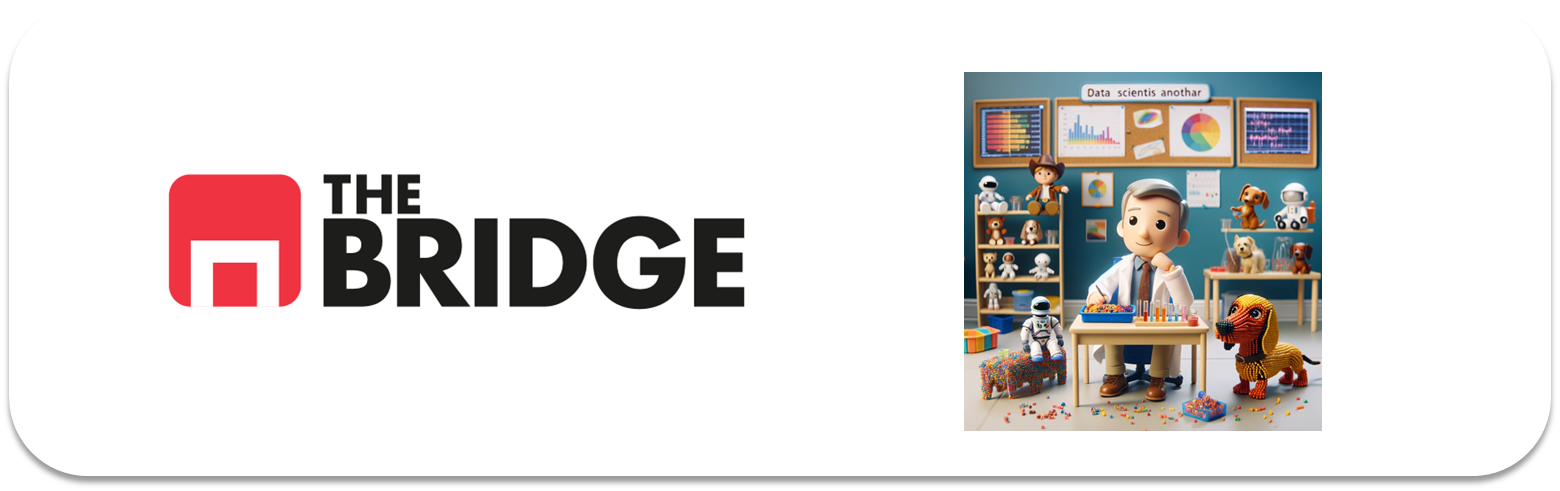

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [6]:
# Obtener los nombres de los datasets disponibles en seaborn
dataset_names = sns.get_dataset_names()

# Mostrar los nombres disponibles
print("Datasets disponibles en seaborn:")
print(dataset_names)

# Cargar el dataset del Titanic
df_titanic = sns.load_dataset("titanic")

Datasets disponibles en seaborn:
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [7]:
# Mostrar las primeras filas del dataset cargado
print("\nDataset del Titanic cargado:")
print(df_titanic.head())


Dataset del Titanic cargado:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [8]:
# Hay nulos en los campos (age, embarked, deck, embark_town)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [9]:
# Porcentaje de nulos por columna
porcentaje_nulos = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print("Porcentaje de nulos por columna:\n",porcentaje_nulos)

# Eliminar la columna "parch"
df_titanic_limpio = df_titanic.drop(columns=["parch"])

# Limpiamos valores nulos
df_titanic_limpio['age'] = df_titanic['age'].fillna(df_titanic['age'].median()) # Mediana
df_titanic_limpio['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0]) # Moda
df_titanic_limpio["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0]) # Moda
df_titanic_limpio.drop(columns=['deck'], inplace=True) # Eliminamos la columna "deck" porque tiene un porcentaje muy alto de nulos

df_titanic_limpio

Porcentaje de nulos por columna:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



In [10]:
ds_titanic_limpio = pd.DataFrame([df_titanic_limpio.columns, "", df_titanic_limpio.dtypes]).T.rename(columns = {0: "Columna/Variable",\
                                                                                                                1: "Descripción", 2: "Tipo de Dato"})

for k, desc in ds_titanic_limpio.items():
    if k == "Descripción" and ds_titanic_limpio[k].isna()[0]:
        ds_titanic_limpio["Descripción"][0] = "Superviviente del viaje (Numérico)"
        ds_titanic_limpio["Descripción"][1] = "Clase"
        ds_titanic_limpio["Descripción"][2] = "Sexo"
        ds_titanic_limpio["Descripción"][3] = "Edad"
        ds_titanic_limpio["Descripción"][4] = "Número de hermanos / cónyuges a bordo"
        ds_titanic_limpio["Descripción"][5] = "Tarifa"
        ds_titanic_limpio["Descripción"][6] = "Embarque"
        ds_titanic_limpio["Descripción"][7] = "Clase"
        ds_titanic_limpio["Descripción"][8] = "Género Persona"
        ds_titanic_limpio["Descripción"][9] = "Edad Adulta"
        ds_titanic_limpio["Descripción"][10] = "Ciudad de Embarque"
        ds_titanic_limpio["Descripción"][11] = "Superviviente del viaje (Booleano)"
        ds_titanic_limpio["Descripción"][12] = "Viaja en solitario"

ds_titanic_limpio


,Columna/Variable,Descripción,Tipo de Dato
0,survived,Superviviente del viaje (Numérico),int64
1,pclass,Clase,int64
2,sex,Sexo,object
3,age,Edad,float64
4,sibsp,Número de hermanos / cónyuges a bordo,int64
5,fare,Tarifa,float64
6,embarked,Embarque,object
7,class,Clase,category
8,who,Género Persona,object
9,adult_male,Edad Adulta,bool


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [11]:
# Southampton (S), Cherburgo (C), Queenstown (Q)

df_titanic_limpio.loc[df_titanic_limpio["embarked"] == "S", "embarked"] = "Southampton"
df_titanic_limpio.loc[df_titanic_limpio["embarked"] == "C", "embarked"] = "Cherburgo"
df_titanic_limpio.loc[df_titanic_limpio["embarked"] == "Q", "embarked"] = "Queenstown"

df_titanic_limpio["embarked"].value_counts()

embarked
Southampton    646
Cherburgo      168
Queenstown      77
Name: count, dtype: int64

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [12]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [13]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [14]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


In [15]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

### #2.1 Categóricas

In [16]:
categoricas_viajeros = [
    "who",
    "class",
    "embarked",
    "alone"
]

In [17]:
# La tendencia en los vuelos de Southampton es que los supervivientes son más probables que los no supervivientes
df_titanic_limpio[categoricas_viajeros].mode().T

,0
who,man
class,Third
embarked,Southampton
alone,True


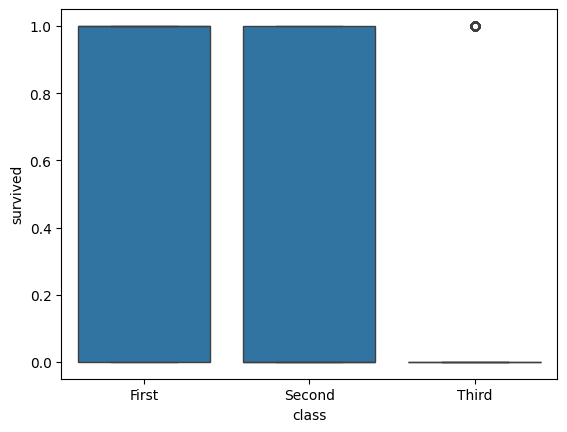

In [18]:
# Hay un gran desbalanceo en la cantidad de supervivientes y no supervivientes en las clases de pasajeros
# De Tercera Clase no hay supervivientes
plot_boxplot_grouped(df_titanic_limpio, "survived", "class")

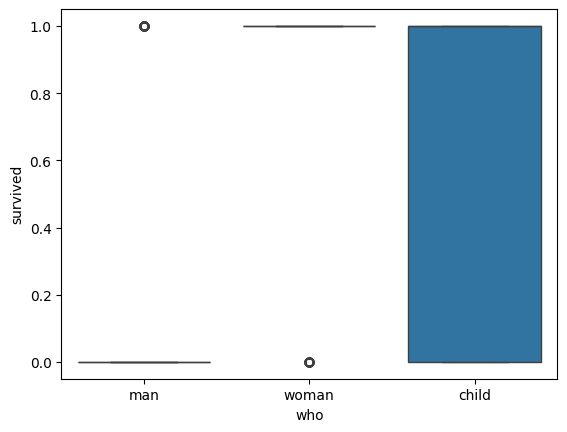

In [19]:
# Hay un gran desbalanceo en la cantidad de supervivientes y no supervivientes entre los hombres y las mujeres
plot_boxplot_grouped(df_titanic_limpio, "survived", "who")

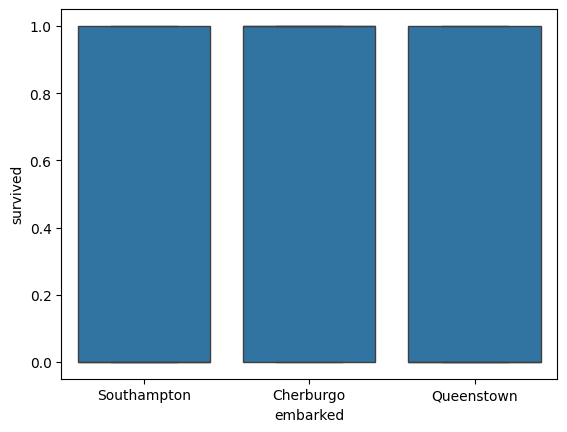

In [ ]:
plot_boxplot_grouped(df_titanic_limpio, "survived", "embarked") # No hay mucho que analizar por lugar de embarque

### #2.2 Numéricas

In [21]:
# Calcular la media y la desviación estándar

def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"] / df_var["mean"]
    return df_var

variabilidad(df_titanic_limpio)

# El valor de pclass tiene una gran variabilidad para analizar

,std,mean,CV
survived,0.486592,0.383838,1.267701
pclass,0.836071,2.308642,0.362149
age,13.019697,29.361582,0.443426
sibsp,1.102743,0.523008,2.108464
fare,49.693429,32.204208,1.543073


In [22]:
columnas_numericas_viajeros = df_titanic_limpio.describe().T.index.to_list()
print(columnas_numericas_viajeros)

# Nos quedamos sólo con las columnas numéricas que nos interesan
columnas_numericas_viajeros = [
    "survived",
    "age",
    "fare"
]

['survived', 'pclass', 'age', 'sibsp', 'fare']


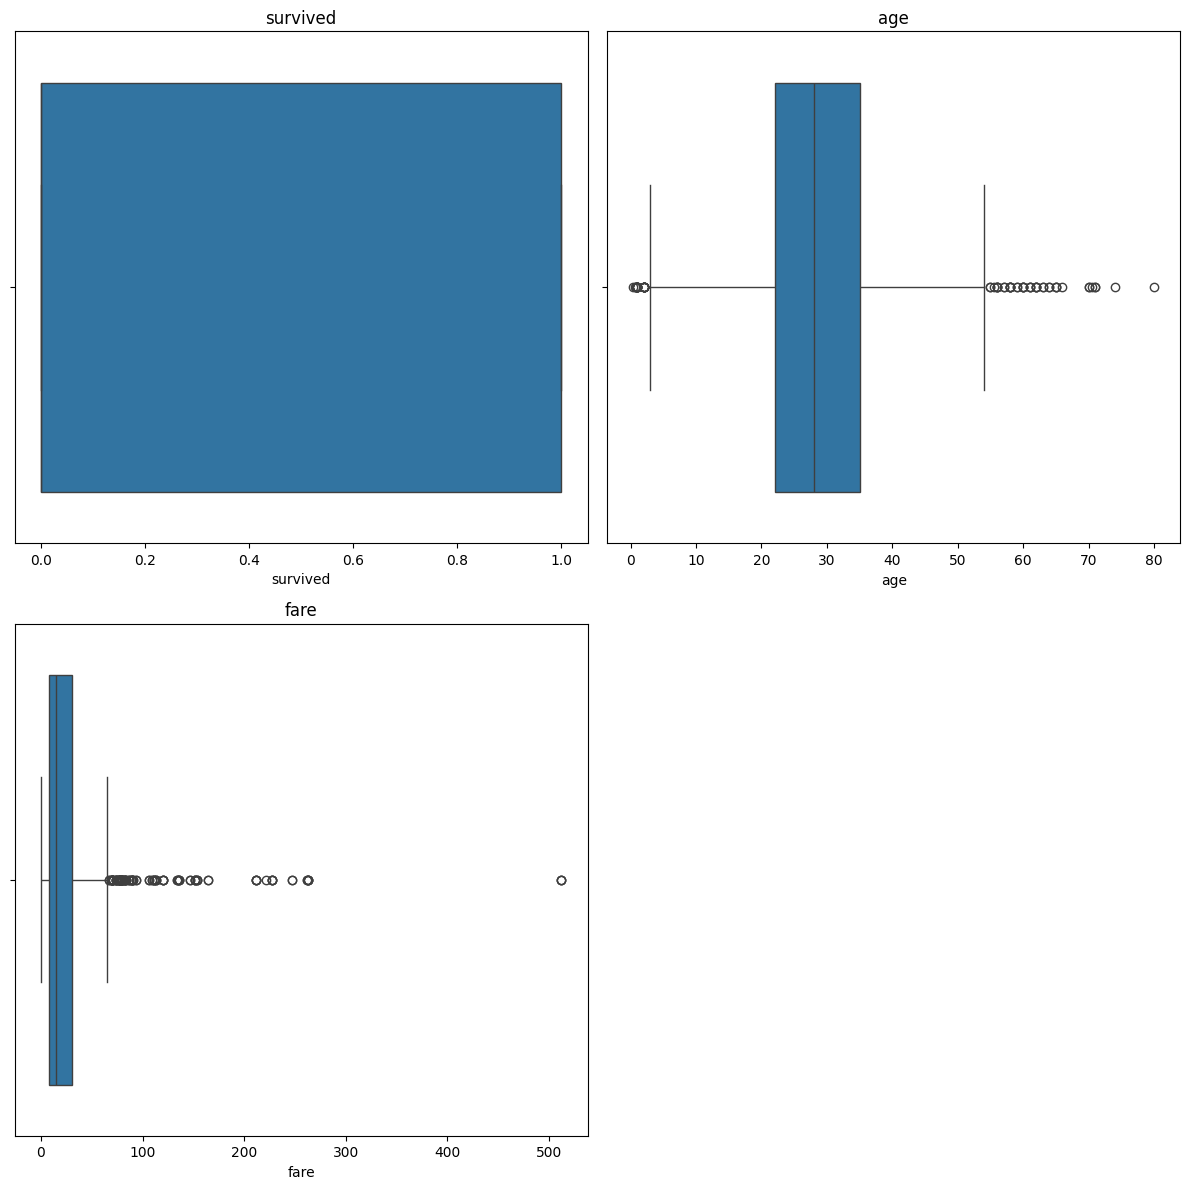

In [23]:
# Analizamos las columnas numéricas que se piden
plot_multiple_boxplots(df_titanic_limpio, columnas_numericas_viajeros)

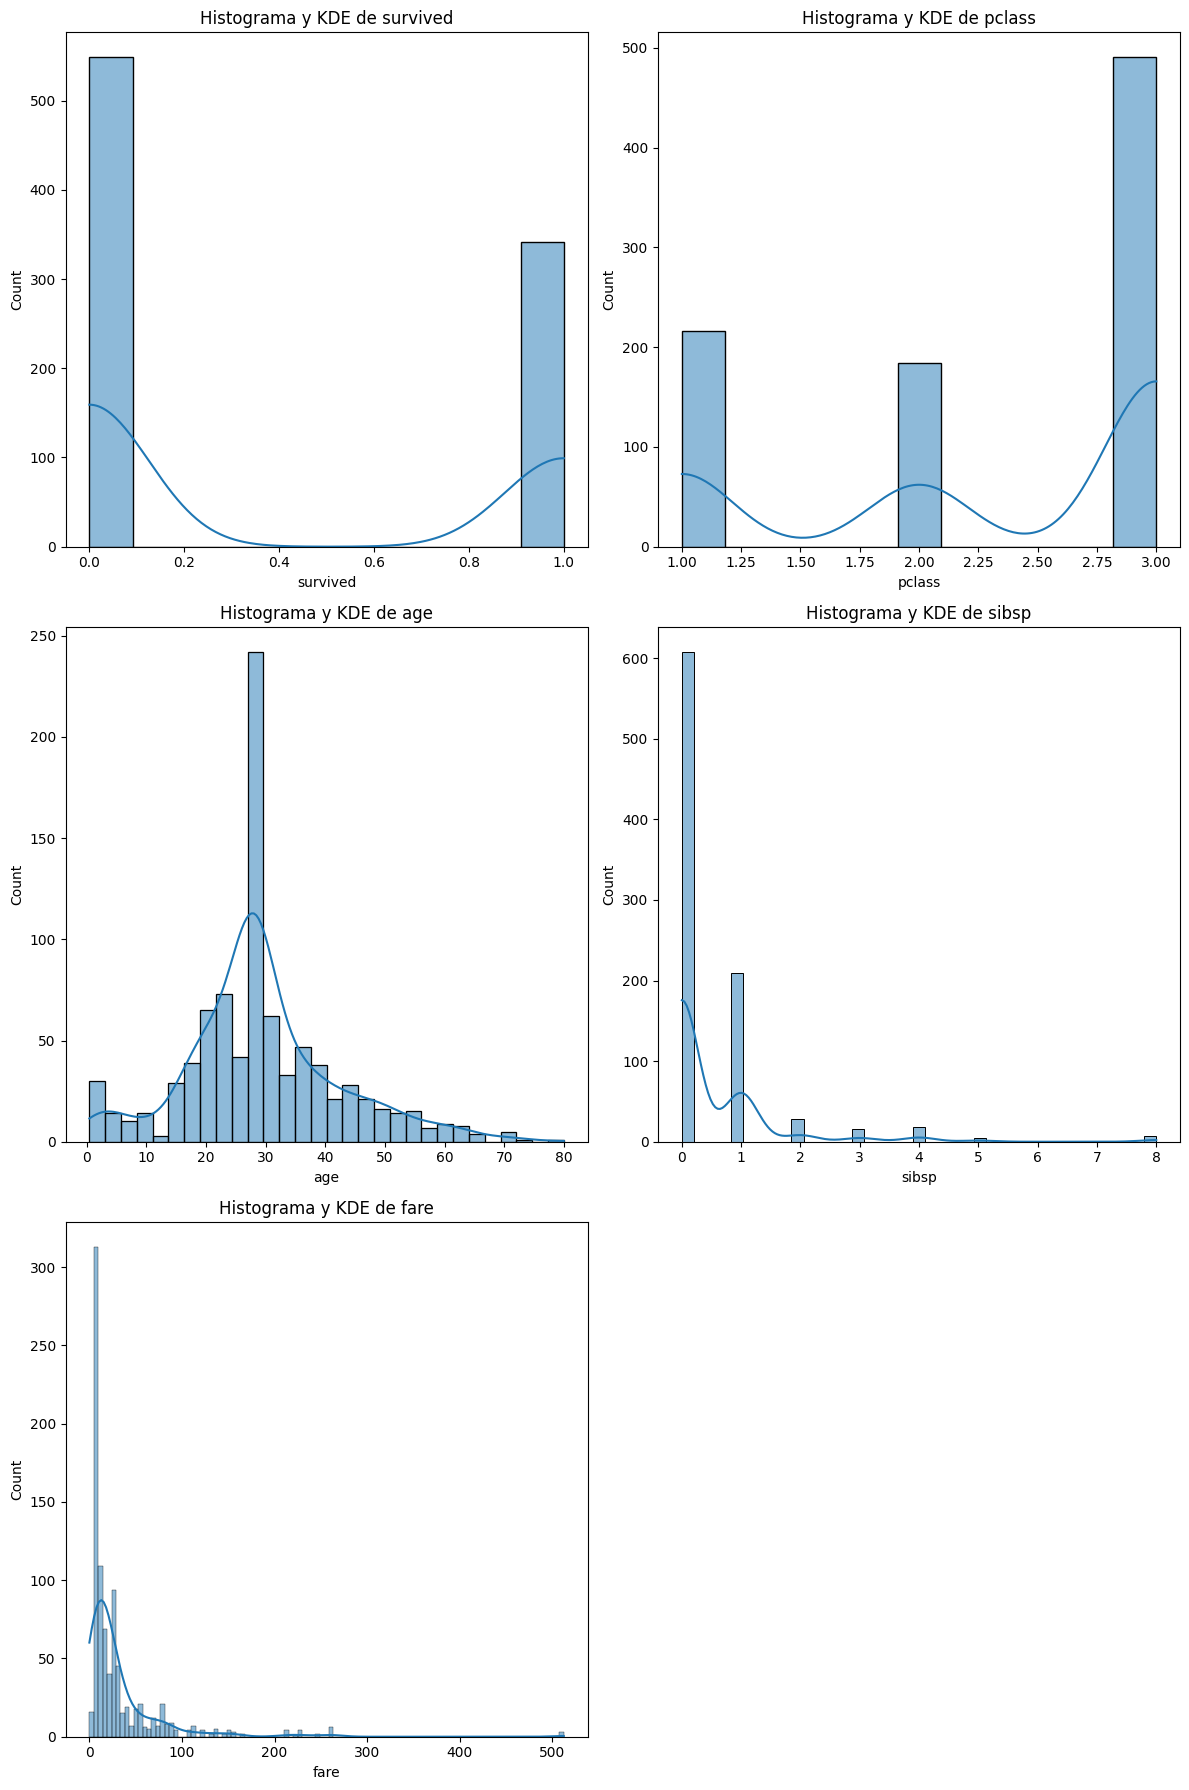

In [24]:
columnas_numericas = df_titanic_limpio.describe().columns.to_list()

plot_histo_den(df_titanic_limpio,columnas_numericas)

(2,)


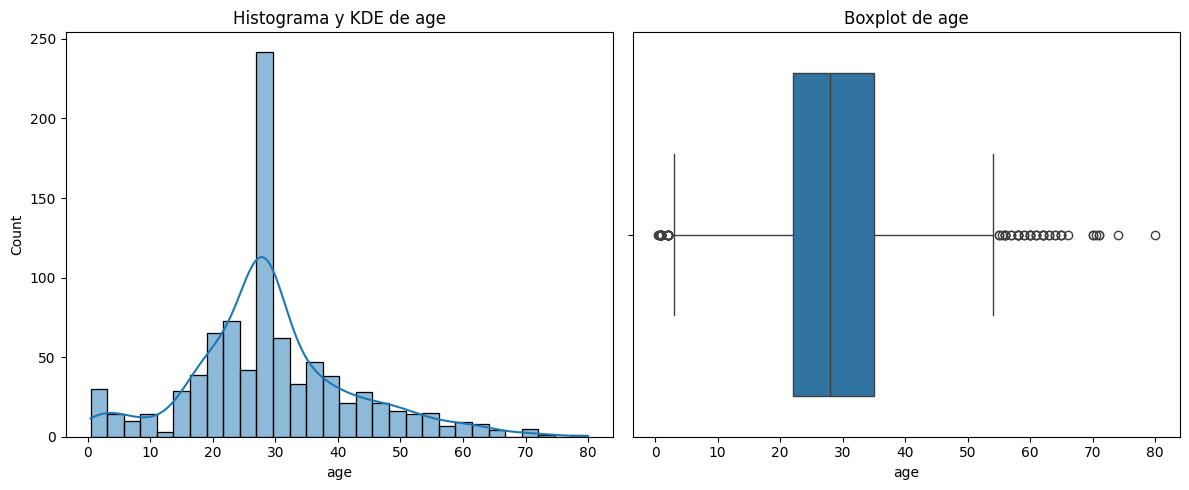

In [25]:
plot_combined_graphs(df_titanic_limpio, ["age"]) # Edades

(2,)


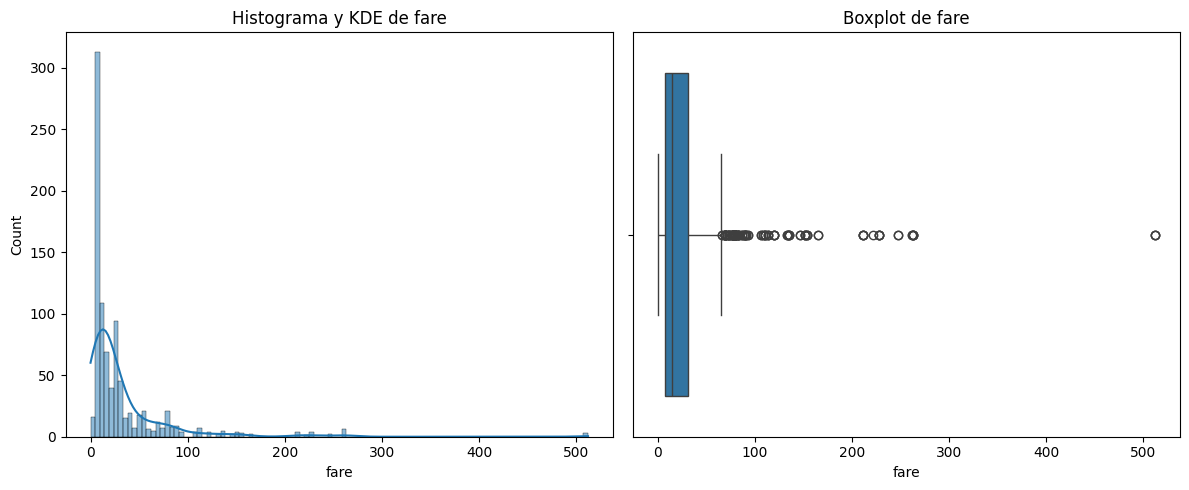

In [26]:
plot_combined_graphs(df_titanic_limpio, ["fare"]) # Tarifas